In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("final_project.ipynb")

# Final Project: Penguins! (and other things)

Welcome to the Final Project of CMPSC 5B!

Here is a roadmap for this project:
* In Part 1, we'll investigate the correlations between some penguin features and build a linear regression model.
* In Part 2, we'll build a classification model to have python try and classify each type of penguin based on its features.
* In Part 3, you'll design your own model (either linear regression or classification) using the whichever dataset.


**Logistics**

**Checkpoint.** For full credit, you must **complete Part 1 project and submit it by Friday March 8, 11:59pm** (check Gradescope for exact due date)  You may or may not have lab time to work on these questions, we recommend that you start early on each part to stay on track. Since your Final Project (checkpoint) is your first draft of your project, we want to give you feedback so that you can make corrections for the full submission.

**Deadline.** The full project is due on **Friday, March 15, 2024, 11:59pm** during Week 10 (check Gradescope for exact due date). It's **much** better to be early than late, so start working now.

**Partners.** You may work with one other partner; this partner **does not** need to be from the same lab section. Only one of you is required to submit the project. In Gradescope, the person who submits should also designate their partner so that both of you receive credit. Here is how you [add a group member in Gradescope](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members). 

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for other courses (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Ed, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Ed post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or ULA for help. 

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Also, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your answer to one question, do not reassign it later on.

To get started, load `datascience`, `numpy`, and `plots`

In [2]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import altair as alt

# The Dataset

Penguins are super cute and interesting. You may disagree but you are wrong. Today we are going to use our penguin dataset, which contain rows of different penguins and their features.

Our [dataset](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook) contains the following columns and information:

1. **species** - indicates what type of penguin (Adelie, Chinstrap, Gentoo)
2. **island** - which island our penguin came from
3. **culmen_length_mm** - The culmen is the upper ridge of a bird's beak. For simplicity we will be referencing culmin as their beaks in the future. This is the penguin's beak length in millimeter.
4. **culmen_depth_mm** - This is the penguin's beak depth in millimeter.
5. **flipper_length_mm** - This is the penguin's flipper (or wings) length in millimeter.
6. **body_mass_g** - This is how much the penguin weighs in grams.
7. **sex** - The sex of the penguin.

Run the cell below to read the `penguin` table.

In [3]:
# Run this cell to load our dataset!
penguins = Table.read_table('data/penguin.csv')
penguins.show(5)

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18,195,3250,FEMALE
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190,3650,MALE


If you are interested in taking PSTAT 100, below is a code cell that shows a glimpse of what you will be taught in that class. You don’t have to understand it now (of course!), but these are cool visualizations we want to expose you to. These graphs are interactive, so you zoom-in/zoom-out of them or drag the visualizations around to see different parts of the graph!

In [4]:
# just run this cell, you will learn about this if you take PSTAT 100!
source = pd.read_csv('data/penguin.csv')

chart1 = alt.Chart(source).mark_circle(size=60).encode(
    x= alt.X('culmen_length_mm', scale=alt.Scale(domain=(25, 65))),
    y= alt.Y('culmen_depth_mm', scale=alt.Scale(domain=(12, 22))),
    color='species'
).properties(width=300,height=300).interactive()

chart2 = alt.Chart(source).mark_circle(size=60).encode(
    x= alt.X('flipper_length_mm', scale=alt.Scale(domain=(165, 235))),
    y= alt.Y('culmen_depth_mm', scale=alt.Scale(domain=(12, 22))),
    color='species'
).properties(width=300,height=300).interactive()

chart3 = alt.Chart(source).mark_circle(size=60).encode(
    x= alt.X('body_mass_g', scale=alt.Scale(domain=(2500, 6500))),
    y= alt.Y('flipper_length_mm', scale=alt.Scale(domain=(165, 235))),
    color='species'
).properties(width=300,height=300).interactive()

chart4 = alt.Chart(source).mark_circle(size=60).encode(
    x= alt.X('body_mass_g', scale=alt.Scale(domain=(2500, 6500))),
    y= alt.Y('culmen_depth_mm', scale=alt.Scale(domain=(12, 22))),
    color='species'
).properties(width=300,height=300).interactive()

(chart1 & chart3) | (chart2 & chart4)

alt.HConcatChart(...)

A goal of this project is to introduce you to the concept of classifying two things based on their features. In this case, from our visualizations we can see that between the three penguins, it looks like the Adelie penguins and the Gentoo penguins are most different from each other. The Chinstrap penguin shares some characteristics with the other two, so it might be hard to identify this type of penguin based on the data we have. Thus, it’s best to focus on the two most different penguin species: Adelie and Gentoo. Sucks to be a chinstrap I guess.

**Question 1.0:** In the cell below, filter out our `penguins` table to only contain rows of Adelie penguins and Gentoo penguins. Store this new table as `cool_penguins`.

*HINT: If you are stuck, I think the midterm might tell you how to do this somewhere...*

In [5]:
cool_penguins = penguins.where("species", are.equal_to("Adelie") | are.equal_to("Gentoo"))
cool_penguins.show(5)

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18,195,3250,FEMALE
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [6]:
grader.check("q1_0")

q1_0 results: All test cases passed!

# PART 1: Penguin Correlation & Linear Regression

Let’s find out which two variables are most correlated with each other! Below we’ve given you a function that will take in an array of numbers and convert it into standard units. This function will be useful for calculating the correlation between two arrays.

**Question 1.1.1:** Define a function `penguin_corr` which takes in three arguments:
- `tbl`: The table we are using (in this case, cool_penguins)
- `col1` , `col2`: The string of which column we want within our table (eg. `culmen_length_mm`)

The function should return the correlation between the two columns in our array

In [7]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

def penguin_corr(tbl, col1, col2):
    return np.mean(standard_units(tbl.column(col1)) * standard_units(tbl.column(col2)))

In [8]:
grader.check("q1_1_1")

q1_1_1 results: All test cases passed!

Nice! Let’s see this `penguin_corr` function in action. 

**Question 1.1.2:** First, produce a scatter plot with `body_mass_g` on the x axis and `culmen_depth_mm` on the y axis. If produced correctly, you should see two scatter groups: The Adelie penguins on the top and Gentoo penguins on the bottom.

Then, assign `beak_and_body` with the correlation coefficient r between the two variables. (This is when you use the `penguin_corr` function)

-0.483941346244


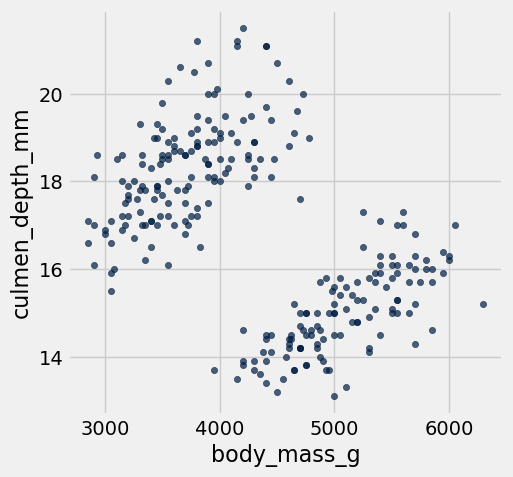

In [9]:
# Produce plot here
cool_penguins.scatter("body_mass_g", "culmen_depth_mm")

# Calculate r here
beak_and_body = penguin_corr(cool_penguins,"body_mass_g", "culmen_depth_mm")

print(beak_and_body)

In [10]:
grader.check("q1_1_2")

q1_1_2 results: All test cases passed!

Wait…that’s weird. Why is the correlation NEGATIVE? That can’t be right…right?

You see, what is happening here is a statistical phenomenon called Simpson’s Paradox.This happens when groups of data exhibit some sort of trend (eg. larger Adelie penguins have larger beaks, same for Gentoo), but when combined exhibit the opposite trend. We have the Gentoo penguins, which are typically larger in size but have smaller beaks mixed in with Adelie penguins which are typically smaller in size and have bigger beaks. They both seem to express the notion that the bigger the penguin, the bigger the beaks, but combining the two penguins together confuses Python since it just assumes that all these penguins are the same.

You’re not expected to fully understand what Simpson’s Paradox is or why it happens. We just wanted to show you something cool.

Thankfully, there is a way to get around Simpson’s Paradox: Calculating the correlation separately for each penguin!

**Question 1.1.3:** In the cell below, compute the correlation between the same two variables (culmen depth and body mass) but for each penguin species! Assign the correlation for the Adelie penguins to `Adele` and the correlation for Gentoo penguins to `Gen2`.

In [11]:
Adele = penguin_corr(cool_penguins.where("species", are.equal_to("Adelie")), "body_mass_g", "culmen_depth_mm")
Gen2 = penguin_corr(cool_penguins.where("species", are.equal_to("Gentoo")), "body_mass_g", "culmen_depth_mm")

print('Adelie Correlation is {0}, Gentoo Correlation is {1}'.format(Adele, Gen2))

Adelie Correlation is 0.5801560058681454, Gentoo Correlation is 0.7182652211738181


In [12]:
grader.check("q1_1_3")

q1_1_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

WooHoo! We’re not insane! In general, a bigger penguin correlates to a bigger beak size. 

**Question 1.1.4:** Thus, can we conclude that being bigger *causes* the penguin to have a bigger beak? Explain your reasoning. 

Yes, we can conclude that being bigger causes the penguin to have a bigger beak. As seen by the graph and the calculated correlation r = 0.5 > 0, there is a positive correlation between size and beak size.

<!-- END QUESTION -->


Let’s start working on some good old linear regression. 

**Question 1.2.1:** First, produce a scatter plot with `body_mass_g` on the x axis and `flipper_length_mm` on the y axis. 

Then, assign `pengu` with the correlation coefficient r between the two variables.

0.884524681236


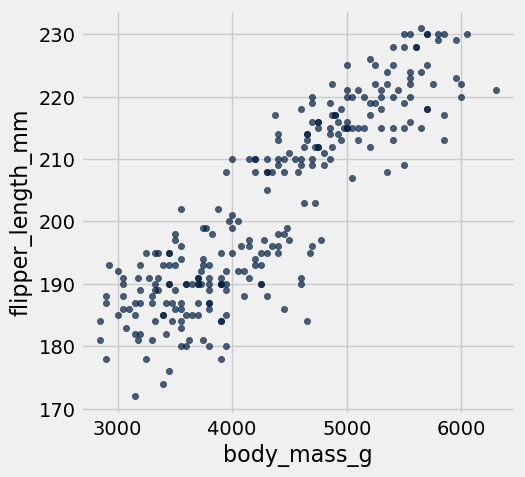

In [13]:
# Produce plot here
cool_penguins.scatter("body_mass_g", "flipper_length_mm")

# Calculate r here
pengu = penguin_corr(cool_penguins,"body_mass_g", "flipper_length_mm")

print(pengu)

In [14]:
grader.check("q1_2_1")

q1_2_1 results: All test cases passed!

Our scatterplot has a nice singular pattern. While it would be better to separate our dataset into Adelie penguins and Gentoo penguins, for the sake of simplicity, we can keep them combined for this example. 

**Question 1.2.2:** Let’s create a simple linear regression model in which we are trying to predict a penguin’s `body_mass_g` based on its `flipper_length_mm`

Assign to the variables `slope` and `intercept` the values of the slope and intercept respectively  using`body_mass_g` as our X variable and `flipper_length_mm` as our Y variable.

In [17]:
# define slope and intercept here
slope = pengu * np.std(cool_penguins.column("body_mass_g")) /  np.std(cool_penguins.column("flipper_length_mm"))
intercept = np.mean(cool_penguins.column("body_mass_g")) - slope * np.mean(cool_penguins.column("flipper_length_mm"))


print('slope: ', slope)
print('intercept: ', intercept)

slope:  49.4061806092
intercept:  -5666.21751476


In [18]:
grader.check("q1_2_2")

q1_2_2 results: All test cases passed!


**Question 1.2.3:** Finally, create a table with three columns.
The first column should be your X, also known as the `flipper_length_mm` column from your `cool_penguins` table.
The second column should be your Y, also known as the `body_mass_g` column from your `cool_penguins` table.
The third column will be something you create. It should be called `predicted_body_mass_g`. Using the slope and intercept that you have calculated, compute the estimated body mass using the `flipper_length_mm` as the predictor variable.

*HINT 1: Look at Q3.1 of Lab4 to see how you computed the regression line*

*HINT 2: What you produced in that question (predicted_rnaseq) is an array of predicted numbers. How do you add an array of numbers to a table as a column?*

In [20]:
# While it's possible to do this in one line, breaking this problem into steps might be more helpful!
prediction = cool_penguins.select("flipper_length_mm", "body_mass_g")
prediction = prediction.with_column("predicted_body_mass_g", slope * cool_penguins.column("flipper_length_mm") + intercept)

prediction.show(5)

flipper_length_mm,body_mass_g,predicted_body_mass_g
181,3750,3276.3
186,3800,3523.33
195,3250,3967.99
193,3450,3869.18
190,3650,3720.96


In [21]:
grader.check("q1_2_3")

q1_2_3 results: All test cases passed!

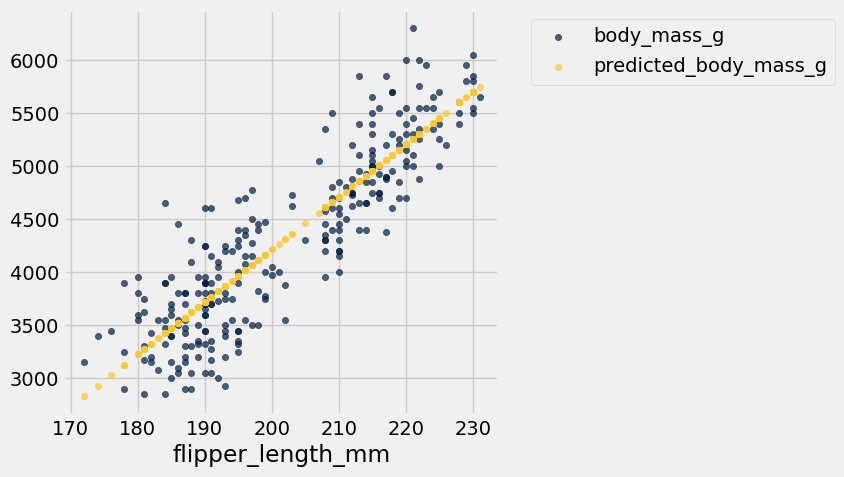

In [22]:
# Run this cell to produce a scatter plot
prediction.scatter('flipper_length_mm')

Nice work! You have defined a linear regression model to predict a penguin’s body mass based on its flipper length. In Part 2, you will build a K-Nearest-Neighbor classifier to try and guess which type of penguin (either Adelie or Gentoo) a penguin is based on its attributes.


# Checkpoint
**Congratulations, you have reached the checkpoint!**

Follow the steps in the Submit your Work section (the last section) of this notebook and submit your Final Project Checkpoint to Gradescope.

# PART 2: Penguin Classification

Let's begin implementing the k-Nearest Neighbors algorithm. 

**Question 2.1.1:** Define the `distance` function, which takes in two arguments: an array of numerical features, and a different array of numerical features. The function should return the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two arrays. Euclidean distance is often referred to as the straight-line distance formula that you may have learned previously.

Here is the formula if needed:

$\sqrt{\sum [(array 1) - (array 2)]^2}$

In [ ]:
def distance(arr1, arr2):
    ...

# Don't change/delete the code below in this cell. distance_example should be ~5
distance_example = distance(make_array(1, 2, 3), make_array(4, 5, 6))
distance_example

In [ ]:
grader.check("q2_1_1")

We learned in this class that table.sample() will randomly select rows from any tables. We can control which rows are to be picked every single time through something called a random seed eg. `np.random.seed(5)` Basically, the gist of code is that it makes the randomness predictable. There is a certain order in which our rows will be picked for seed(5), and that order will always be the same. No matter how many times you run the cell below, it will always result in the same table. For the sake of this project, keep the random seed to be 5, standing for 5b :D

We want to shuffle our table “randomly” because our original table had all the Adelie penguins on the top and the Gentoo penguins on the bottom. This is important for what we are about to do next.

**NOTE: Our new table is now called `rad_penguins`** 

In [ ]:
# Run this cell
np.random.seed(5)

rad_penguins = cool_penguins.sample(with_replacement = True)
rad_penguins.show(5)

Next, let's split our dataset into a training set and a test set. This is so we can use our training set to build our classifier, and the test set to see if our model was able to accurately predict the information we want. This is also to prevent something called overfitting (which is beyond the scope of this class, you will learn more about it in PSTAT 100!) but the general gist of this concept is like this (you can skip this section if you want):
- Pretend that you are a machine learning model. To prepare for your next math test, you train yourself by studying the study guide. You choose to study the entire study guide.
- You study the study guide super well. Thus, when you try and test your knowledge, you quiz yourself on how you do on that exact same study guide. Unsurprisingly, you know how to do every single problem on that study guide and get a 100%.
- Now it’s time for the real world. You go and take that math test. However, you ONLY studied for your study guide, and struggle to understand and apply what was supposed to be learned from that study guide to the real test. You fail :(
This is similar to what overfitting is, and why we avoid it. We want our machine learning model to learn the concept and idea of what our data is trying to say, and use this data to make inference on real things.

**Question 2.1.2:** Our table `rad_penguins` has a lot of row, so let's create a training set with the first 200 rows and a test set with the remaining rows. Assign `train` with your training set and `test` with your testing set.

*Hint: A policeman tries to capture a criminal. The criminal, confident in his ability to escape yells, “You’ll never TAKE (wink wink) me alive!*

In [ ]:
train = ...
test = ...

In [ ]:
grader.check("q2_1_2")

<!-- BEGIN QUESTION -->

**Question 2.1.3:** Draw a horizontal bar chart with two bars that show the proportion of Adelie penguins in each dataset (both the train and test dataset). Complete the function `adelie_proportion` first; it should help you create the bar chart.

We are creating this bar chart to give us a sanity check that our randomly select rows have roughly the same proportions of each penguin for both the train and test dataset

In [ ]:
def adelie_proportion(table):
    # Return the proportion of penguins in a table that are adelie penguins.
    return ...
# Your solution may take multiple lines.  Start by creating a table.
# If you get stuck, think about what sort of table you need for barh to work

<!-- END QUESTION -->

We want to predict the species of penguin based on four numerical columns.  

**Question 2.1.4:** Assign `features` to an array of the labels of these features from the `rad_penguins` table.

In [ ]:
features = ...
features

In [ ]:
grader.check("q2_1_4")

**Question 2.1.5:** Now define the `classify` function. This function should take in a row from a table like `test` and classify it based on the data in `train` using the `k`-Nearest Neighbors based on the correct `features`. Think of each row in the `test` table as a potential penguin you want to try and guess. Here are some hints if needed, but you should definitely try and attempt this problem without them if you want a challenge haha xD

**THE HINTS:**

- the `row_to_array` function we defined for you to convert rows to arrays of features so that you can use the `distance` function you defined earlier.
- `test_row_features_array` will be an array of four numbers corresponding to each of the four features selected.
- `distances` will be an empty array you will populate with the distance. More on this later.
- `train_row_features_array` , similar to before, will be an array of four numbers corresponding to each of the four features selected. Every time our loop goes to each row, this array will change to be the four feature values of each row.
- `row_distance` Here we want you to compute the Euclidean distance between the testing array and training array.
- `distances` oh? This seems familiar…
- `train_with_distances` Now that we have our array of distances computed from our mystery penguin to our training set penguins, add this array of values to our table.
- `nearest_neighbors` Using k (which is a numerical representation of the closest k amount of penguins we want to take), get the rows for the closest k amount of penguins. This should be a table of only k amount of rows.
- `most_common_label` Using `the nearest_neighbors` table, get the penguin (either Adelie or Gentoo) that appears the most.

In [ ]:
def row_to_array(row, features):
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

def classify(row, k, train):
    test_row_features_array = row_to_array(row, features)
    distances = make_array()
    for train_row in train.rows: # goes through every row in our training set
        train_row_features_array = row_to_array(train_row, features)
        row_distance = ...
        distances = ...
    train_with_distances = ...
    nearest_neighbors = ...
    most_common_label = ...
    ...
    

# Don't modify/delete the code below
first_test = classify(test.row(0), 5, train)
first_test

In [ ]:
grader.check("q2_1_5")

Now that we have defined our K-Nearest Neighbor Classifier, let’s test the accuracy of our model!

Below we have defined a function called `my_classifier` which currently classifies our penguins using 5 nearest neighbors. Feel free to change it using any ODD number you want :)

Then we have `test_with_prediction` which is our original test table with a column called ‘prediction’ which indicates which penguin our classifier predicts each penguin as depending on their features.

**Question 2.1.6:** Assgined `accuracy` to the accuracy of our model

In [ ]:
def my_classifier(row):
    return classify(row, 5, train)

test_with_prediction = test.drop('island', 'sex').with_column("prediction", test.apply(my_classifier))

accuracy = ...
accuracy

In [ ]:
grader.check("q2_1_6")

<!-- BEGIN QUESTION -->

**Question 2.1.7:** Why do we use an odd-numbered `k` in k-NN? Explain.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

Alrighty! We have finished with the Penguins dataset, which covers both linear regression and simple K-nearest neighbors.

# PART 3: Show Us What You've Learned!

For the final portion of your final, we want you to select your own dataset. We have provided these datasets already for you to use. Look through the data folder and load up any csv as a table. If you would like to use your own dataset, by all means please do so. Simply upload the csv file into the data folder and you are ready to go. Some difficulties you may face is that you might encounter messy datasets with missing values or some other errors. These datasets we have provided for you are already cleaned, so you do not need to worry about that. 

The datasets we have provided for you are meant for linear regression, but if you are using your own dataset and you want to do K-nearest neighbors classification, then that is great as well.

If you would like to do an oral presentation for the final, this would be the section you would do it on!

To get full credit on this portion, you must meet all of the following requirements.

1. **Clean Table:** Please showcase what your table looks like and explain what each column represents (look in the beginning of the project where it explains what each column has as a reference).
 - For Linear Regression, you should only have 2 columns at this stage. 
 - For K-nearest neighbors, you should have a target column and multiple (at least 3) predictor feature columns.


2. **Methodology:** Depending on whether you are doing linear regression or KNN classification, under each cell of code, please document and write down what you are doing and how each piece of code gets you to the end of your goal (If you do KNN classification, one thing to note is that we typically split our dataset into ~80% training and ~20%). It doesn’t have to be a paragraph for each section, just some sentences to help guide the readers through what you are doing. This will make your project easier for us to understand, as well as showcasing how well you understand which method you choose to do. Example could be something like:
 - “Here we computed the correlation coefficient r between X and Y”
 - “Here we used r to compute our slope, and our slope to compute the intercept”


3. **Model Performance:** This is when you showcase your model and its performance. 
 - For Linear Regression: We would like to see a scatter plot with the regression line (as done in the first part). Explain what the slope and intercept means in the scope of your data, calculate the RMSE to evaluate the performance of your regression line (not done in this project, but reference an old homework), and do some outside research to explain why you think you got the result that you did.
 - For KNN Classification, we would like you to build a classification model with the features you chose (at least 3)  and calculate the accuracy score. Then, we would like you to tune your model in two 2 ways: One is changing the k value to a different number (pretty simple), and the other way is adding/removing features to your model (for example, we could have only used 3 columns instead of 4 in our penguin classifier). We want you to experiment with changing up your models in different ways (should have at least 3 models with different parameters in the end) to really showcase how these parameters affect your model. Lastly, we want you to explain what difficulties your KNN classifier may have in relation to your project (as in, what are some reasons your model misclassified your data) and what are some possible ways to solve these issues.

In [ ]:
# START HERE AND GOOD LUCK!

In [ ]:
# REMEMBER TUTORING HOURS ARE OFFERED EVERY DAY 
# MONDAY - FRIDAY
# FIND THE TUTORING HOURS SCHEDULE IN CANVAS, UNDER SCHEDULE TAB

**Question 3.1. CLEAN TABLE:** 
- 1 Point for showcasing your new clean table
- 1 Point for explaining what each column represents

**Question 3.2. METHODOLOGY:** 
- 1 Point for documenting your steps
- 1 Point clarity and accuracy.

**3. MODEL PERFORMANCE:** 
- 1 Point for model showcase (regression scatter plot OR 3 different KNN classifiers)
- 1 Point for model performance (RMSE OR Classification Accuracies)
- 2 Points for results (explain what your regression equation means (remember to include slope & intercept) and why you believe you got this result OR explain what challenges your classifier may have faced regarding some of its misclassification and what could be done to improve it)

**Congratulations!**
**You have completed the CMPSC 5B Final Project.**

# Submit your work

Before you submit your work, 
* Make sure you **save the notebook** first, 
* Then go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
* Now, go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
* Then, go to `File -> Download as -> Notebook` and download the notebook to your own computer. ([Please verify](https://ucsb-ds.github.io/ds1-f20/troubleshooting/#i-downloaded-the-notebook-file-but-it-saves-as-the-ipynbjson-extension-so-whenever-i-upload-it-to-gradescope-it-fails) that it got saved as an `.ipynb` file.)
* Upload the notebook to [Gradescope](https://www.gradescope.com/).